<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/LINC_Pandas_Example_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas** 설치하기 
> pip install pandas

Pandas 는 정형화된 데이터를 다루기에 적합하다

Pandas에서 제공하는 2개의 자료구조인 시리즈(Series)과 데이터프레임(DataFrame)을 이해한다

* Series는 엑셀에서 한개 열(column)과 같는 1차원 리스트와 같은 구조임 

In [ ]:
import pandas as pd # pandas 패키지를 pd라는 이름으로 사용한다

In [ ]:
series = pd.Series([1, 1, 3, 4, 5])
# 왼쪽에는 Series의 인덱스(index)를, 오른쪽은 값(value)를 제공한다
series

0    1
1    1
2    3
3    4
4    5
dtype: int64

In [ ]:
# values는 값을 출력함
series.values

array([1, 1, 3, 4, 5])

In [ ]:
# Index를 출력함
series.index

RangeIndex(start=0, stop=5, step=1)

 특정값의 개수를 출력한다(빈도수를 얻기 위해 사용함)

In [ ]:
series.value_counts()

1    2
5    1
4    1
3    1
dtype: int64

Series 에서 특정값을 접근함 

In [ ]:
# [  ] 안에 조건식을 사용할 수 이다
series[series > 2]

2    3
3    4
4    5
dtype: int64

In [ ]:
# 인덱스를 이용해 값을 제거할수도 있다
series = series.drop(0)
series

1    1
2    3
3    4
4    5
dtype: int64

In [ ]:
# append 함수를 이용하여 값을 추가할수도 있어요. 이때 값은 Series 형태의 값만 추가가 가능합니다
series = series.append(pd.Series([6, 7]))
series

1    1
2    3
3    4
4    5
0    6
1    7
dtype: int64

In [ ]:
# 값을 추가하니 인덱스 조정이 필요하며  reindex 함수를 통해 재정의할 수 있다
series = series.reset_index(drop=True)
series

0    1
1    3
2    4
3    5
4    6
5    7
dtype: int64

In [ ]:
series[1]=100

In [ ]:
import matplotlib.pyplot as plt
series.plot(kind='pie')
plt.show()

<Figure size 640x480 with 1 Axes>

* Series가 엑셀에서 한개 줄을 말한다면 DataFrame은 표 형태의 값이며, 
> Series가 여러개 모이면 Dataframe이 구성됨 

In [ ]:
# DataFrame은 마치 사전과 같은 형태로 초기화한다
dataframe = pd.DataFrame({'힘':[1, 2, 3], '지력':[-2 ,3 ,4], '마력': [2, 1, 0]})
dataframe

,힘,지력,마력
0,1,-2,2
1,2,3,1
2,3,4,0


In [ ]:
# 데이터프레임을 슬라이싱함 
dataframe[:2]

,힘,지력,마력
0,1,-2,2
1,2,3,1


In [ ]:
# 인덱스 0과 2의 행을 얻어옴
dataframe.loc[[0,2]]

,힘,지력,마력
0,1,-2,2
2,3,4,0


In [ ]:
dataframe.loc[[0,2], ['힘']]

,힘
0,1
2,3


In [ ]:
# axis를 0으로 설정하면 특정행(row)를 제거할 수 있다.
dataframe.drop(0, axis=0)

,힘,지력,마력
1,2,3,1
2,3,4,0


In [ ]:
# axis를 1으로 설정하면 열(column)를 제거할 수 있다
dataframe.drop("마력", axis=1)

,힘,지력
0,1,-2
1,2,3
2,3,4


데이터셋(dataset) 의 자료를 읽어 분석을 수행한다.
> 자료 https://www.kaggle.com/c/titanic

* 데이터분석을 통해 데이터가 갖는 특성을 파악함
* 분석을 통해 예측모델 개발에 활용할 수 있음

In [1]:
import pandas as pd
titanic_df = pd.read_csv('train.csv')

In [2]:
# Sibsp 형재자매/배우자 수
# Parch 부모/자녀 수
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.shape

(891, 12)

In [3]:
# 데이터에 대한 기본정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_df = pd.read_csv('train.csv', index_col='PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 데이터프레임의 값에서 null/nan 유무를 검사함
titanic_df.isnull().values.any()  

True

In [5]:
# 값이 없는 데이터 항목 및 수향 확인 
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
value_counts = titanic_df['Pclass'].value_counts()

인덱싱을 통해 시리즈(Series)로 추출함

In [9]:
print(type(value_counts))

<class 'pandas.core.series.Series'>


In [10]:
#탑승객의 이름, 나이, 성별 정보 얻기 (해당 자료를 df1 프레임워크로 구성)

df1 = titanic_df [['Name', 'Age', 'Sex']]

In [11]:
df1.head()

,Name,Age,Sex
PassengerId,,,
1,"Braund, Mr. Owen Harris",22.0,male
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
3,"Heikkinen, Miss. Laina",26.0,female
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
5,"Allen, Mr. William Henry",35.0,male


In [12]:
below_20 = df1[ df1['Age'] < 20]
below_20

,Name,Age,Sex
PassengerId,,,
8,"Palsson, Master. Gosta Leonard",2.0,male
10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female
11,"Sandstrom, Miss. Marguerite Rut",4.0,female
15,"Vestrom, Miss. Hulda Amanda Adolfina",14.0,female
17,"Rice, Master. Eugene",2.0,male
...,...,...,...
856,"Aks, Mrs. Sam (Leah Rosen)",18.0,female
870,"Johnson, Master. Harold Theodor",4.0,male
876,"Najib, Miss. Adele Kiamie ""Jane""",15.0,female


* 조건값을 마스크로 구성함

> Age가 10 보다 크거나 같고 20보다 작은 것을 마스크 구성함 

> Age가 10 보다 작고 female 로 마스크 구성함

In [13]:
mask1 = (titanic_df["Age"] >= 10) & (titanic_df["Age"] < 20)
df_teenage = titanic_df.loc[mask1,:]
print(df_teenage.head())

             Survived Pclass                                  Name     Sex  \
PassengerId                                                                  
10                  1      2   Nasser, Mrs. Nicholas (Adele Achem)  female   
15                  0      3  Vestrom, Miss. Hulda Amanda Adolfina  female   
23                  1      3           McGowan, Miss. Anna "Annie"  female   
28                  0      1        Fortune, Mr. Charles Alexander    male   
39                  0      3    Vander Planke, Miss. Augusta Maria  female   

              Age  SibSp  Parch  Ticket      Fare        Cabin Embarked  
PassengerId                                                              
10           14.0      1      0  237736   30.0708          NaN        C  
15           14.0      0      0  350406    7.8542          NaN        S  
23           15.0      0      0  330923    8.0292          NaN        Q  
28           19.0      3      2   19950  263.0000  C23 C25 C27        S  
39       

In [14]:
mask2 = (titanic_df.Age < 10) & (titanic_df.Sex == 'female')
df_female_under10 = titanic_df.loc[mask2, :]
print(df_female_under10.head())

             Survived Pclass                                      Name  \
PassengerId                                                              
11                  1      3           Sandstrom, Miss. Marguerite Rut   
25                  0      3             Palsson, Miss. Torborg Danira   
44                  1      2  Laroche, Miss. Simonne Marie Anne Andree   
59                  1      2              West, Miss. Constance Mirium   
120                 0      3         Andersson, Miss. Ellis Anna Maria   

                Sex  Age  SibSp  Parch         Ticket     Fare Cabin Embarked  
PassengerId                                                                    
11           female  4.0      1      1        PP 9549  16.7000    G6        S  
25           female  8.0      3      1         349909  21.0750   NaN        S  
44           female  3.0      1      2  SC/Paris 2123  41.5792   NaN        C  
59           female  5.0      1      2     C.A. 34651  27.7500   NaN        S  
1

In [15]:
    mask3 = (titanic_df.Pclass ==  1) | (titanic_df.Pclass== 2)
    df_pclass_12 = titanic_df.loc[mask3, :]
    print(df_pclass_12)

             Survived Pclass  \
PassengerId                    
2                   1      1   
4                   1      1   
7                   0      1   
10                  1      2   
12                  1      1   
...               ...    ...   
881                 1      2   
884                 0      2   
887                 0      2   
888                 1      1   
890                 1      1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
7                                      McCarthy, Mr. Timothy J    male  54.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
12                                    Bonnell, Miss. Elizabeth  female  58.0   
...                    

In [16]:
df_pclass_12.loc[mask3, 'Name']

PassengerId
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
7                                McCarthy, Mr. Timothy J
10                   Nasser, Mrs. Nicholas (Adele Achem)
12                              Bonnell, Miss. Elizabeth
                             ...                        
881         Shelley, Mrs. William (Imanita Parrish Hall)
884                        Banfield, Mr. Frederick James
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
890                                Behr, Mr. Karl Howell
Name: Name, Length: 400, dtype: object

타이타닉 승객의 평균 연령 구하기

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df['Age'].median()

28.0

#### 1등, 2등, 3등석 승객수
print(value_counts)

Embarked (승선지)

In [40]:
titanic_df[["Embarked", "Sex"]].nunique()

Embarked    3
Sex         2
dtype: int64

In [41]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
titanic_df["Embarked"] = titanic_df["Embarked"].astype("category")
titanic_df["Embarked"].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [43]:
# 새로 생성된 'Age_0' 열의 모든 값은 0 으로 채워진다
titanic_df['Age_0'] = 0

In [44]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized),Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southhampton,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton,0


In [45]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)

In [46]:
titanic_drop_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized)
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southhampton


In [47]:
titanic_df = pd.read_csv('train.csv')

In [27]:
indexes = titanic_df.index

In [28]:
print (indexes)

RangeIndex(start=0, stop=891, step=1)


In [29]:
indexes.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
indexes[:5].values

array([0, 1, 2, 3, 4])

In [49]:
titanic_sorted = titanic_df.sort_values(by = ['Name'])

In [48]:
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [50]:
titanic_sorted = titanic_df.sort_values(by = ['Pclass','Name'])

In [34]:
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [35]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [36]:
titanic_df[ ['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [37]:
titanic_df['Embarked(Humanized)'] = titanic_df['Embarked'].replace('C', 'Cherbourg').replace('S', 'Southhampton').replace('Q', 'Queenstown')

In [38]:
titanic_df.iloc[1:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked(Humanized)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southhampton


In [39]:
titanic_df.loc[1:3, ['Name', 'Sex']]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
print(titanic_df.groupby(['Sex', 'Pclass']).mean()['Survived'])
print(titanic_df.groupby(['Sex', 'Pclass']).std()['Survived'])


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.176716
        2         0.271448
        3         0.501745
male    1         0.484484
        2         0.365882
        3         0.342694
Name: Survived, dtype: float64


In [90]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

전체 생존률은 살펴보기

0    549
1    342
Name: Survived, dtype: int64


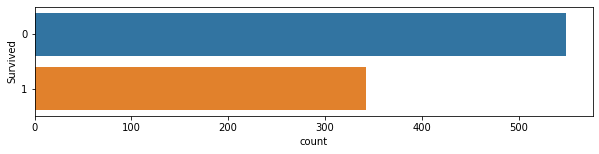

In [89]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=titanic_df)
print(titanic_df.Survived.value_counts())

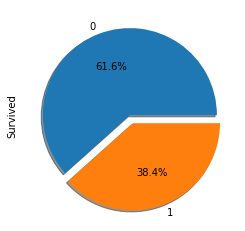

In [96]:
titanic_df["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

* Survived열만 분석해본 결과 61.4%가 사망하고 38.4%만 생존 했음

Pclass 별 생존자 % 살펴보기 

In [95]:
titanic_df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pcalss Survived vs Not Survived')

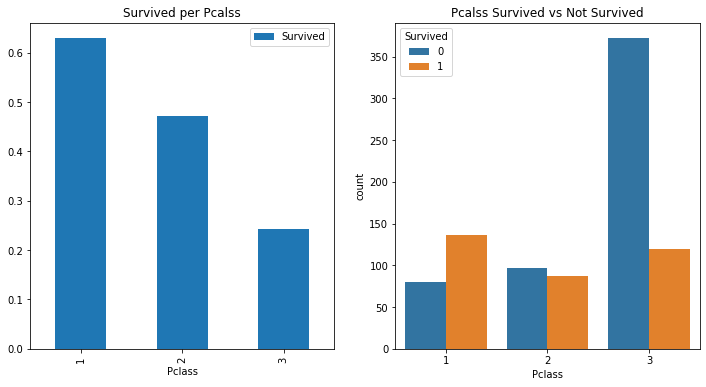

In [94]:
f,ax=plt.subplots(1,2,figsize=(12,6))
titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass',hue='Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')

성별에 따른 생존 비율 살펴보기

In [98]:
titanic_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

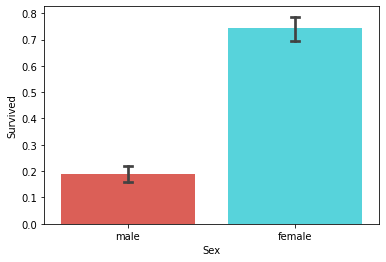

In [88]:
sns.barplot(x = 'Sex', y = 'Survived',  data = titanic_df,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8  
            )

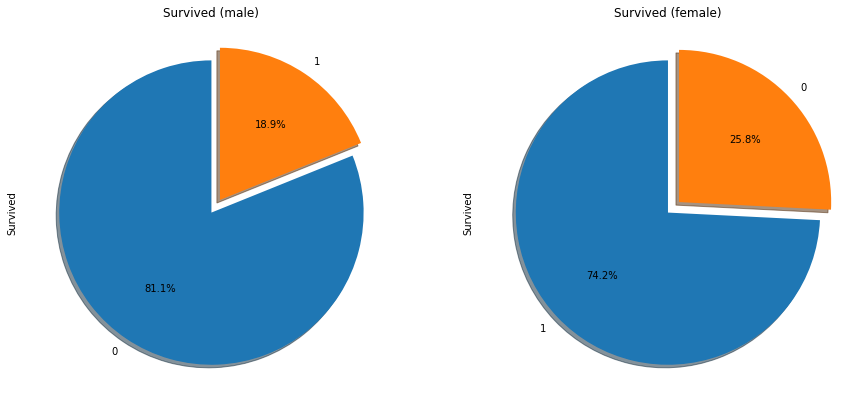

In [97]:
f, ax=plt.subplots(1,2,figsize=(15,7))
 
# 남성 생존 확률
titanic_df['Survived'][titanic_df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True, startangle=90)
 
# 여성 생존 확률
titanic_df['Survived'][titanic_df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[1],shadow=True, startangle=90)
 
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
 
plt.show()

남성은 81.1%가 사망하고 18.9%만 생존했고, 여성은 25.8%가 사망하고 74.2%가 생존했습니다.
이를 통해 레이디퍼스트가 이루어졌다는 것을 예상할 수 있습니다.

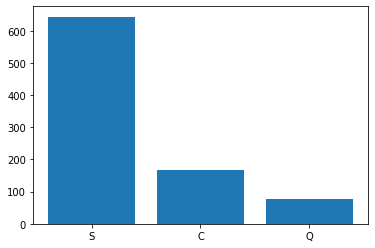

In [72]:
embarked = titanic_df['Embarked'].value_counts()  # 반드시 집계 먼저
plt.bar(embarked.index, embarked.values)
plt.show()

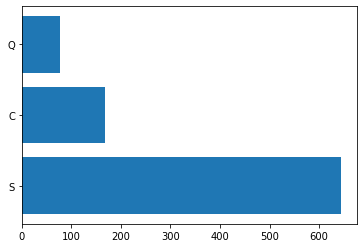

In [74]:
embarked = titanic_df['Embarked'].value_counts()  # 반드시 집계 먼저
plt.barh(embarked.index, embarked.values)
plt.show()

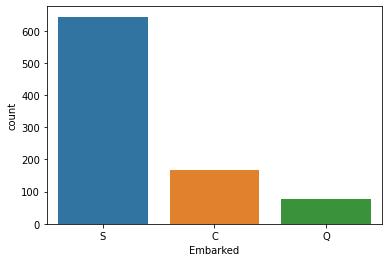

In [76]:
sns.countplot(x='Embarked', data=titanic_df)
plt.show()

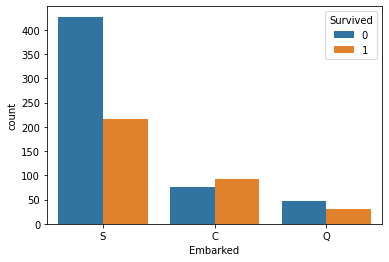

In [77]:
sns.countplot(x='Embarked', data=titanic_df, hue = 'Survived')
plt.show()

선실별 생존율 살펴보기

In [102]:
titanic_df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

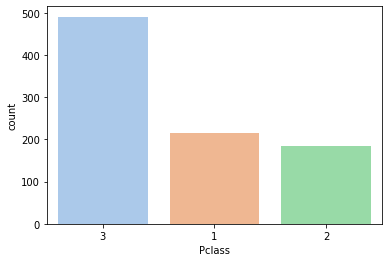

In [78]:
sns.countplot(x='Pclass', data=titanic_df, palette = sns.color_palette("pastel"),
              order = titanic_df['Pclass'].value_counts().index)
plt.show()

In [103]:
titanic_df.groupby( ['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

* 여성인 경우 1등급일때 생존 확률이 96.80% 2등급인 경우 92.10% 3등급인 경우  50%

* 남성인 경우 1등급일때 생존 확률이 37% 2등급인 경우 16% 3등급인 경우 14%

* 등급이 낮을 수록 생존율 저하 

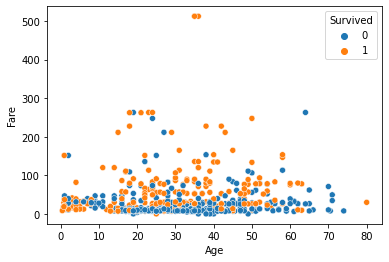

In [66]:
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Survived')
plt.show()

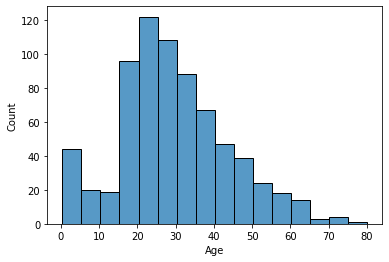

In [68]:
sns.histplot(data=titanic_df, x='Age', bins=16)
plt.show()

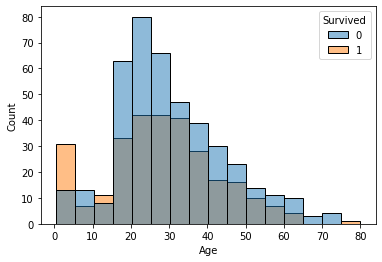

In [69]:
sns.histplot(data=titanic_df, x='Age', bins=16, hue='Survived')
plt.show()

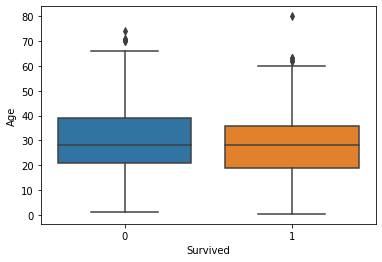

In [70]:
sns.boxplot(data=titanic_df, x='Survived', y='Age')
# 또는
# sns.boxplot(x=titanic['Survived'], y=titanic['Age'])
plt.show()

In [51]:
grouped_age = titanic_df.groupby(['Age'])['Survived'].count()

In [52]:
grouped_age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Survived, Length: 88, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


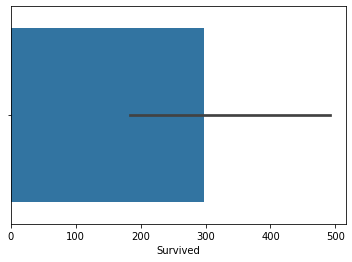

In [64]:
ax = plt.plot()
ax = sns.barplot(grouped_age)


In [57]:
grouped_pclass = titanic_df.groupby(['Pclass'])['Survived'].count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


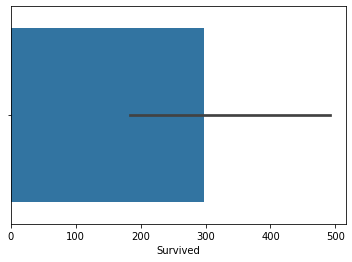

In [65]:
ax = plt.plot()
ax = sns.barplot(grouped_pclass)